In [ ]:
# Importo todas las librerías que voy a necesitar más adelante
import pandas as pd # Para levantar los datos del .xlsx
import numpy as np # Para calcular valor medio, trabajar con vectores, etc.
from scipy import stats   # Para calcular error estandard de la media y test de medias
from statsmodels.stats import proportion  # Error estándar y test de proporciones
import matplotlib.pyplot as plt # Para graficar

In [ ]:
data = pd.read_excel(io="/content/2.xlsx")

print(data)

    Participante  Idioma  Framing  respuesta
0             P2       1        1          2
1             P3       1        1          2
2             P5       1        1          1
3             P7       1        1          2
4            P11       1        1          2
..           ...     ...      ...        ...
202         P183       2        2          2
203         P185       2        2          2
204         P190       2        2          1
205         P194       2        2          1
206         P207       2        2          1

[207 rows x 4 columns]


In [ ]:
#Me quedo con las personas que hablan español, les toco framing positivo
español_positivo= data[(data["Idioma"]==1) & (data["Framing"]==1)]["respuesta"]

#Me quedo con las personas que hablan español, les toco framing negativo
español_negativo= data[(data["Idioma"]==1) & (data["Framing"]==2)]["respuesta"]

#Me quedo con las personas que hablan ingles, les toco framing positivo
ingles_positivo= data[(data["Idioma"]==2) & (data["Framing"]==1)]["respuesta"]

#Me quedo con las personas que hablan ingles, les toco framing negativo
ingles_negativo= data[(data["Idioma"]==2) & (data["Framing"]==2)]["respuesta"]

Comenzamos por graficar las respuestas utilitarias

In [ ]:
proportionValuesU = np.array([np.sum(español_positivo==1)/np.size(español_positivo),np.sum(español_negativo==1)/np.size(español_negativo),np.sum(ingles_positivo==1)/np.size(ingles_positivo),np.sum(ingles_negativo==1)/np.size(ingles_negativo)])
#Sólo hicimos suma(valores) dividido el número total; un promedio hecho a mano.

countTotalU = np.array([np.sum(español_positivo==1), np.sum(español_negativo==1),np.sum(ingles_positivo==1),np.sum(ingles_negativo==1)]) #lo vamos a necesitar después.
#print(count)
count0U = np.array([np.sum(español_positivo==1), np.sum(español_negativo==1)])
count1U = np.array([np.sum(español_positivo==1), np.sum(ingles_positivo==1)])
count2U = np.array([np.sum(español_positivo==1), np.sum(ingles_negativo==1)])
count3U = np.array([np.sum(español_negativo==1), np.sum(ingles_positivo==1)])
count4U = np.array([np.sum(español_negativo==1), np.sum(ingles_negativo==1)])
count5U = np.array([np.sum(ingles_positivo==1), np.sum(ingles_negativo==1)])

# También necesitamos la cantidad de respuestas totales que hay en cada grupo:

sampleSizeTotalU = np.array([np.size(español_positivo), np.size(español_negativo), np.size(ingles_positivo),np.size(ingles_negativo)])
#print(sampleSize)
sampleSize0U = np.array([np.size(español_positivo), np.size(español_negativo)])
sampleSize1U = np.array([np.size(español_positivo), np.size(ingles_positivo)])
sampleSize2U = np.array([np.size(español_positivo), np.size(ingles_negativo)])
sampleSize3U = np.array([np.size(español_negativo), np.size(ingles_positivo)])
sampleSize4U = np.array([np.size(español_negativo), np.size(ingles_negativo)])
sampleSize5U = np.array([np.size(ingles_positivo), np.size(ingles_negativo)])

# Calculo el error estandar para una proporción (automático):
sepValuesU = proportion.std_prop(proportionValuesU,sampleSizeTotalU)

print("La proporción de respuestas afirmativas/correctas para la primera condición es:",round(proportionValuesU[0],2),"+-",round(sepValuesU[0],2),
        "\nPara la segunda:",round(proportionValuesU[1],2),"+-",round(sepValuesU[1],2),
        "\nPara la tercera:",round(proportionValuesU[2],2),"+-",round(sepValuesU[1],2),
        "\nPara la cuarta:",round(proportionValuesU[3],2),"+-",round(sepValuesU[1],2))

La proporción de respuestas afirmativas/correctas para la primera condición es: 0.22 +- 0.06 
Para la segunda: 0.18 +- 0.05 
Para la tercera: 0.29 +- 0.05 
Para la cuarta: 0.42 +- 0.05


"EPD": Español Positivo Utilitario

"END": Español Negativo Utilitario

"IPD": Ingles Positivo Utilitario

"IND": Ingles Negativo Utilitario

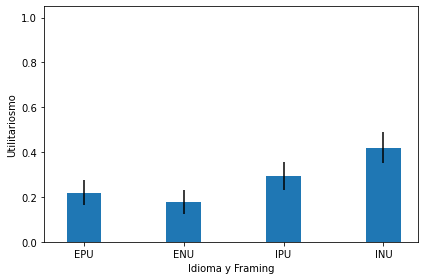

In [ ]:
# Visualizo los datos presentados en la celda anterior
xAxis = np.arange(4)
fig, ax = plt.subplots(1)
# Dado que los valores estan acotados entre 0 y 1, utilizo gráfico de barras
plt.bar(xAxis, proportionValuesU, yerr = sepValuesU, width=0.35, color='tab:blue', align='center')
plt.ylim([0, 1.05])
plt.yticks(np.arange(0,1.1,0.2))
plt.xlim(-0.4) 
plt.ylabel('Utilitariosmo')
plt.xticks(xAxis, ["EPU","ENU","IPU","INU"])
plt.xlabel('Idioma y Framing')
plt.tight_layout()

Tests estadisticos de todos los utilitarios en todas las condiciones

In [ ]:
## Ahora realizamos un test de proporciones entre los dos grupos, para las respuestas categóricas:

# Para este test, le pasamos la cantidad del tipo de respuestas que nos interesa (afirmativas; esto lo calculamos antes)
#y el tamaño de los datos (también lo calculamos antes).

# En ambas condiciones
stat, pval = proportion.proportions_ztest(count0U, sampleSize0U)
print("Test de proporciones\nz:",stat, "p:",pval)
print(format(pval, '.8f'))

Test de proporciones
z: 0.5383357869341407 p: 0.5903452490076961
0.59034525


In [ ]:
## Ahora realizamos un test de proporciones entre los dos grupos, para las respuestas categóricas:

# Para este test, le pasamos la cantidad del tipo de respuestas que nos interesa (afirmativas; esto lo calculamos antes)
#y el tamaño de los datos (también lo calculamos antes).

# En ambas condiciones
stat, pval = proportion.proportions_ztest(count1U, sampleSize1U)
print("Test de proporciones\nz:",stat, "p:",pval)
print(format(pval, '.8f'))

Test de proporciones
z: -0.8965420741700652 p: 0.36996331959097883
0.36996332


In [ ]:
## Ahora realizamos un test de proporciones entre los dos grupos, para las respuestas categóricas:

# Para este test, le pasamos la cantidad del tipo de respuestas que nos interesa (afirmativas; esto lo calculamos antes)
#y el tamaño de los datos (también lo calculamos antes).

# En ambas condiciones
stat, pval = proportion.proportions_ztest(count2U, sampleSize2U)
print("Test de proporciones\nz:",stat, "p:",pval)
print(format(pval, '.8f'))

Test de proporciones
z: -2.2248363297588605 p: 0.026092227555195645
0.02609223


In [ ]:
## Ahora realizamos un test de proporciones entre los dos grupos, para las respuestas categóricas:

# Para este test, le pasamos la cantidad del tipo de respuestas que nos interesa (afirmativas; esto lo calculamos antes)
#y el tamaño de los datos (también lo calculamos antes).

# En ambas condiciones
stat, pval = proportion.proportions_ztest(count3U, sampleSize3U)
print("Test de proporciones\nz:",stat, "p:",pval)
print(format(pval, '.8f'))

Test de proporciones
z: -1.400549342771779 p: 0.1613488783157584
0.16134888


In [ ]:
## Ahora realizamos un test de proporciones entre los dos grupos, para las respuestas categóricas:

# Para este test, le pasamos la cantidad del tipo de respuestas que nos interesa (afirmativas; esto lo calculamos antes)
#y el tamaño de los datos (también lo calculamos antes).

# En ambas condiciones
stat, pval = proportion.proportions_ztest(count4U, sampleSize4U)
print("Test de proporciones\nz:",stat, "p:",pval)
print(format(pval, '.8f'))

Test de proporciones
z: -2.6778879137375853 p: 0.0074088006605993574
0.00740880


In [ ]:
## Ahora realizamos un test de proporciones entre los dos grupos, para las respuestas categóricas:

# Para este test, le pasamos la cantidad del tipo de respuestas que nos interesa (afirmativas; esto lo calculamos antes)
#y el tamaño de los datos (también lo calculamos antes).

# En ambas condiciones
stat, pval = proportion.proportions_ztest(count5U, sampleSize5U)
print("Test de proporciones\nz:",stat, "p:",pval)
print(format(pval, '.8f'))

Test de proporciones
z: -1.3206498925768315 p: 0.18661812875716555
0.18661813


Ahora graficamos los deontologicos

In [ ]:
# Para cualquier codificación vale hacerlo a mano (ojo que estamos contando respuestas AFIRMATIVAS):
proportionValuesD = np.array([np.sum(español_positivo==2)/np.size(español_positivo),np.sum(español_negativo==2)/np.size(español_negativo),np.sum(ingles_positivo==2)/np.size(ingles_positivo),np.sum(ingles_negativo==2)/np.size(ingles_negativo)])
#sólo hice suma(valores) dividido el número total; un promedio hecho a mano.

#Si quisieran ver ustedes la suma de cuántas respuestas afirmativas hay para cada condición, pueden hacer esto (y printearlo después):

countTotalD = np.array([np.sum(español_positivo==2), np.sum(español_negativo==2),np.sum(ingles_positivo==2),np.sum(ingles_negativo==2)]) #lo vamos a necesitar después.
#print(count)
count0D = np.array([np.sum(español_positivo==2), np.sum(español_negativo==2)])
count1D = np.array([np.sum(español_positivo==2), np.sum(ingles_positivo==2)])
count2D = np.array([np.sum(español_positivo==2), np.sum(ingles_negativo==2)])
count3D = np.array([np.sum(español_negativo==2), np.sum(ingles_positivo==2)])
count4D = np.array([np.sum(español_negativo==2), np.sum(ingles_negativo==2)])
count5D = np.array([np.sum(ingles_positivo==2), np.sum(ingles_negativo==2)])

# También necesitamos la cantidad de respuestas totales que hay en cada grupo:

sampleSizeTotalD = np.array([np.size(español_positivo), np.size(español_negativo), np.size(ingles_positivo),np.size(ingles_negativo)])
#print(sampleSize)
sampleSize0D = np.array([np.size(español_positivo), np.size(español_negativo)])
sampleSize1D = np.array([np.size(español_positivo), np.size(ingles_positivo)])
sampleSize2D = np.array([np.size(español_positivo), np.size(ingles_negativo)])
sampleSize3D = np.array([np.size(español_negativo), np.size(ingles_positivo)])
sampleSize4D = np.array([np.size(español_negativo), np.size(ingles_negativo)])
sampleSize5D = np.array([np.size(ingles_positivo), np.size(ingles_negativo)])

# Calculo el error estandar para una proporción (automático):
sepValuesD = proportion.std_prop(proportionValuesD,sampleSizeTotalD)

print("La proporción de respuestas afirmativas/correctas para la primera condición es:",round(proportionValuesD[0],2),"+-",round(sepValuesD[0],2),
        "\nPara la segunda:",round(proportionValuesD[1],2),"+-",round(sepValuesD[1],2),
        "\nPara la tercera:",round(proportionValuesD[2],2),"+-",round(sepValuesD[1],2),
        "\nPara la cuarta:",round(proportionValuesD[3],2),"+-",round(sepValuesD[1],2))

La proporción de respuestas afirmativas/correctas para la primera condición es: 0.78 +- 0.06 
Para la segunda: 0.82 +- 0.05 
Para la tercera: 0.71 +- 0.05 
Para la cuarta: 0.58 +- 0.05


"EPD": Español Positivo Deontologico

"END": Español Negativo Deontologico

"IPD": Ingles Positivo Deontologico

"IND": Ingles Negativo Deontologico

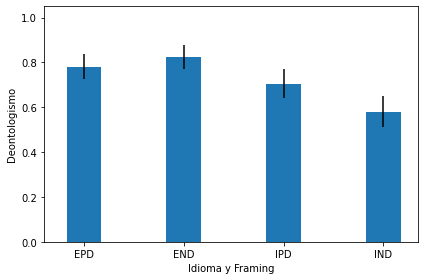

In [ ]:
# Visualizo los datos presentados en la celda anterior
xAxis = np.arange(4)
fig, ax = plt.subplots(1)
# Dado que los valores estan acotados entre 0 y 1, utilizo gráfico de barras
plt.bar(xAxis, proportionValuesD, yerr = sepValuesD, width=0.35, color='tab:blue', align='center')
plt.ylim([0, 1.05])
plt.yticks(np.arange(0,1.1,0.2))
plt.xlim(-0.4) 
plt.ylabel('Deontologismo')
plt.xticks(xAxis, ["EPD","END","IPD","IND"])
plt.xlabel('Idioma y Framing')
plt.tight_layout()

Test Estadisticos de las respuestas deontologicas

In [ ]:
## Ahora realizamos un test de proporciones entre los dos grupos, para las respuestas categóricas:

# Para este test, le pasamos la cantidad del tipo de respuestas que nos interesa (afirmativas; esto lo calculamos antes)
#y el tamaño de los datos (también lo calculamos antes).

# En ambas condiciones
stat, pval = proportion.proportions_ztest(count0D, sampleSize0D)
print("Test de proporciones\nz:",stat, "p:",pval)
print(format(pval, '.8f'))

Test de proporciones
z: -0.53833578693414 p: 0.5903452490076968
0.59034525


In [ ]:
## Ahora realizamos un test de proporciones entre los dos grupos, para las respuestas categóricas:

# Para este test, le pasamos la cantidad del tipo de respuestas que nos interesa (afirmativas; esto lo calculamos antes)
#y el tamaño de los datos (también lo calculamos antes).

# En ambas condiciones
stat, pval = proportion.proportions_ztest(count1D, sampleSize1D)
print("Test de proporciones\nz:",stat, "p:",pval)
print(format(pval, '.8f'))

Test de proporciones
z: 0.8965420741700647 p: 0.36996331959097917
0.36996332


In [ ]:
## Ahora realizamos un test de proporciones entre los dos grupos, para las respuestas categóricas:

# Para este test, le pasamos la cantidad del tipo de respuestas que nos interesa (afirmativas; esto lo calculamos antes)
#y el tamaño de los datos (también lo calculamos antes).

# En ambas condiciones
stat, pval = proportion.proportions_ztest(count2D, sampleSize2D)
print("Test de proporciones\nz:",stat, "p:",pval)
print(format(pval, '.8f'))

Test de proporciones
z: 2.2248363297588614 p: 0.026092227555195562
0.02609223


In [ ]:
## Ahora realizamos un test de proporciones entre los dos grupos, para las respuestas categóricas:

# Para este test, le pasamos la cantidad del tipo de respuestas que nos interesa (afirmativas; esto lo calculamos antes)
#y el tamaño de los datos (también lo calculamos antes).

# En ambas condiciones
stat, pval = proportion.proportions_ztest(count3D, sampleSize3D)
print("Test de proporciones\nz:",stat, "p:",pval)
print(format(pval, '.8f'))

Test de proporciones
z: 1.4005493427717777 p: 0.16134887831575873
0.16134888


In [ ]:
## Ahora realizamos un test de proporciones entre los dos grupos, para las respuestas categóricas:

# Para este test, le pasamos la cantidad del tipo de respuestas que nos interesa (afirmativas; esto lo calculamos antes)
#y el tamaño de los datos (también lo calculamos antes).

# En ambas condiciones
stat, pval = proportion.proportions_ztest(count4D, sampleSize4D)
print("Test de proporciones\nz:",stat, "p:",pval)
print(format(pval, '.8f'))

Test de proporciones
z: 2.6778879137375853 p: 0.0074088006605993574
0.00740880


In [ ]:
## Ahora realizamos un test de proporciones entre los dos grupos, para las respuestas categóricas:

# Para este test, le pasamos la cantidad del tipo de respuestas que nos interesa (afirmativas; esto lo calculamos antes)
#y el tamaño de los datos (también lo calculamos antes).

# En ambas condiciones
stat, pval = proportion.proportions_ztest(count5D, sampleSize5D)
print("Test de proporciones\nz:",stat, "p:",pval)
print(format(pval, '.8f'))

Test de proporciones
z: 1.3206498925768326 p: 0.1866181287571651
0.18661813
